In [36]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import _canoeValues as cv

#-------------------Inputs-------------------------------------------------------------
script = "Longitudinal Analysis_3 Paddler.ipynb"
input_file = "Station Information.csv"
outerHull_file = "Outer Hull.csv" # Will be used for hydrostatic force and waterline calculation
DLF = cv.DLF # Dead Load Factor
LLF = 1.3 # Live Load Factor
pad_weights = cv.pad_weights # Weight of paddlers (kg)
water_den = cv.water_density # Density of water = 1000 kg/m^3
#--------------------------------------------------------------------------------------
# Acquire the waterline from grasshopper
grasshopper = cv.grasshopper[2] # [mm]

pad1_po = 1500 # Position of first paddler with respect to left end of canoe (mm)
pad2_po = 3118 # Position of second paddler with respect to left end of canoe (mm)
pad3_po = 4350 # Position of third paddler with respect to left end of canoe (mm)
# Choose between pad_weights
pad_first = pad_weights[2]
pad_second = pad_weights[4]
pad_third = pad_weights[4]
pad1 = pad_first*LLF
pad2 = pad_second*LLF
pad3 = pad_third*LLF
# [pad1, pad2, pad3] = [x*LLF for x in [pad_first, pad_second, pad_third]]
#--------------------------------------------------------------------------------------

script_dir = os.path.abspath('data')# absolute file path in Jupyter
file_path = os.path.join(script_dir, input_file) # file path for the text file input
canoe_info = pd.read_csv(file_path, header=None)
statVol = canoe_info[1]
statMass = canoe_info[2]
statWeight = canoe_info[3]
statDist = canoe_info[4]

file_path = os.path.join(script_dir, outerHull_file) # file path for the text file input
out_coor = pd.read_csv(file_path, header=None)
x_out = out_coor[0]
y_out = out_coor[1]
z_out = out_coor[2]

# Convert Series to List
stat_Mass = []
for i in range(1, len(statMass), 1):
    stat_Mass.append(float(statMass[i]))

stat_Vol = []
for i in range(1, len(statVol), 1):
    stat_Vol.append(float(statVol[i]))

# Calculate mass with paddlers
paddlerPositions = [pad1_po, pad2_po, pad3_po]
paddlerWeights = [pad1, pad2, pad3]
nextPaddler = 0
total_mass = 0

stat_Mass_Paddlers = []
lengthTravelled = 0
for i in range(1, len(statMass), 1):
    station_mass = float(statMass[i]) * DLF
    lengthTravelled += float(statDist[i])
    if nextPaddler < len(paddlerPositions) and lengthTravelled >= paddlerPositions[nextPaddler]:
        station_mass += paddlerWeights[nextPaddler]
        nextPaddler += 1
    #     print(i, '\033[92m' + str(station_mass) + '\033[0m')
    # else:
    #     print(i, station_mass)
        
    stat_Mass_Paddlers.append(station_mass)
    total_mass += station_mass
print(total_mass)

canoe_volume = np.sum(stat_Vol) # m^3
canoe_mass = np.sum(stat_Mass) #[kg]
total_mass = canoe_mass*DLF + pad1 + pad2 + pad3 #[kg]

print(total_mass)

station_no = x_out.nunique() # number of stations
station = x_out.unique() # location of each station

337.37205210058295
337.3720521005828


In [37]:

# NOTE: Very similar to above code cell. Will update accordingly after reviewing above cell with Kielen.

# Outer Hull Volume
vol_out = []
for k in range(1,station_no-2,1):

    X1_value = station[k]
    Y1 = []
    Z1 = []

    X2_value = station[k+1]
    Y2 = []
    Z2 = []

    for i in range(0,len(x_out),1):
        if x_out[i] == X1_value:
            Y1.append(y_out[i])
            Z1.append(z_out[i])

        elif x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])
    
    volume = 0
    if len(Y1) > 0:
        n = int((len(Y1)-1)/2)
        for j in range(0,n,1):
            area1 = (abs(Y1[j])+abs(Y1[j+1]))*abs(Z1[j]-Z1[j+1])/2*2
            area2 = (abs(Y2[j])+abs(Y2[j+1]))*abs(Z2[j]-Z2[j+1])/2*2
            volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
        # triangle piece at the bottom
        area1 = abs(Y1[n-1])*abs(Z1[n-1])/2*2
        area2 = abs(Y2[n-1])*abs(Z2[n-1])/2*2
        volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
        vol_out.append(volume)

outer_volume = np.sum(vol_out)/10**9 #[m^3]

In [38]:
# lol no waterline
# canoe_depth = max(abs(z_out)) 
# waterline = canoe_depth - grasshopper # distance from the water surface to the bottom of canoe [mm]

# # Calculate the waterline for each station
# # Since the 3-paddler case is not necessarily symmetrical, we need to calculate the waterline dynamically for each station.

# # First, we must find the station representing the center of mass.
# massTravelled = 0
# centerStation = -1
# while massTravelled < total_mass/2:
#   centerStation += 1
#   massTravelled += stat_Mass_Paddlers[centerStation]

# print(centerStation)

# slope = 0

# for k in range(1,station_no-2,1):
#   waterline * slope * (k - centerStation)

In [39]:
# <?><?> Until waterline fixed D:
canoe_depth = max(abs(z_out)) 
waterline = canoe_depth - grasshopper # distance from the water surface to the bottom of canoe [mm]


increment = 1 # push down waterline by [] mm
water_weight = outer_volume*water_den # Assume canoe is fully submerged in water



#while water_weight - total_mass > 10:
vol_out = []
for k in range(1,station_no-2,1):
    X1_value = station[k]
    X2_value = station[k+1]
    Y1 = []
    Y2 = []
    Z1 = []
    Z2 = []

    for i in range(0,len(x_out),1):
        if canoe_depth - abs(z_out[i]) <= waterline:
            if x_out[i] == X1_value:
                Y1.append(y_out[i])
                Z1.append(z_out[i])

            elif x_out[i] == X2_value:
                Y2.append(y_out[i])
                Z2.append(z_out[i])
    
    Y1.insert(0, Y1[0])
    Y1.append(Y1[len(Y1)-1])
    Z1.insert(0, waterline - canoe_depth)
    Z1.append(waterline - canoe_depth)
    
    Y2.insert(0, Y2[0])
    Y2.append(Y2[len(Y2)-1])
    Z2.insert(0, waterline - canoe_depth)
    Z2.append(waterline - canoe_depth)
    
    
    volume = 0
    if len(Y1)/2 == 0:
        n = int(len(Y1)/2)
        for j in range(0,n,1):
            area1 = (abs(Y1[j])+abs(Y1[j+1]))*abs(Z1[j]-Z1[j+1])/2*2
            area2 = (abs(Y2[j])+abs(Y2[j+1]))*abs(Z2[j]-Z2[j+1])/2*2
            volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
    else:
        n = int((len(Y1)-1)/2)
        for j in range(0,n,1):
            area1 = (abs(Y1[j])+abs(Y1[j+1]))*abs(Z1[j]-Z1[j+1])/2*2
            area2 = (abs(Y2[j])+abs(Y2[j+1]))*abs(Z2[j]-Z2[j+1])/2*2
            volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
        # triangle piece at the bottom
        area1 = abs(Y1[n-1])*abs(Z1[n-1])/2*2
        area2 = abs(Y2[n-1])*abs(Z2[n-1])/2*2
        volume = volume + abs(X1_value - X2_value)*(area1 + area2)/2
        vol_out.append(volume)


# Volumes of decks
X1_value = station[0]
X2_value = station[0+1]
Y1 = []
Y2 = []
Z1 = []
Z2 = []

for i in range(0,len(x_out),1):
    if x_out[i] == X1_value:
        Y1.append(y_out[i])
        Z1.append(z_out[i])

    if canoe_depth - abs(z_out[i]) <= waterline:
        if x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])

l = abs(max(Y2)-min(Y2))
w = abs(max(Z2)-min(Z2))
h = abs(X2_value - X1_value)
volume = l*w*h/3
vol_out.insert(0, volume)

X1_value = station[len(station)-1]
X2_value = station[len(station)-2]
Y1 = []
Y2 = []
Z1 = []
Z2 = []

for i in range(0,len(x_out),1):
    if x_out[i] == X1_value:
        Y1.append(y_out[i])
        Z1.append(z_out[i])
        
    if canoe_depth - abs(z_out[i]) <= waterline:
        if x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])

l = abs(max(Y2)-min(Y2))
w = abs(max(Z2)-min(Z2))
h = abs(X2_value - X1_value)
volume = l*w*h/3
vol_out.append(volume)


water_volume = np.sum(vol_out)/10**9 #[m^3]
water_weight = water_volume*water_den
    
    #waterline = waterline - increment

print('The depth of water is ', waterline, ' mm.')
print('The waterline is at', canoe_depth-waterline, 'mm.')
print('The weight of water is ', water_weight, 'kg.')
print('The total weight is ', total_mass, 'kg.')

The depth of water is  200.0  mm.
The waterline is at 140.0 mm.
The weight of water is  412.05720203281925 kg.
The total weight is  337.3720521005828 kg.


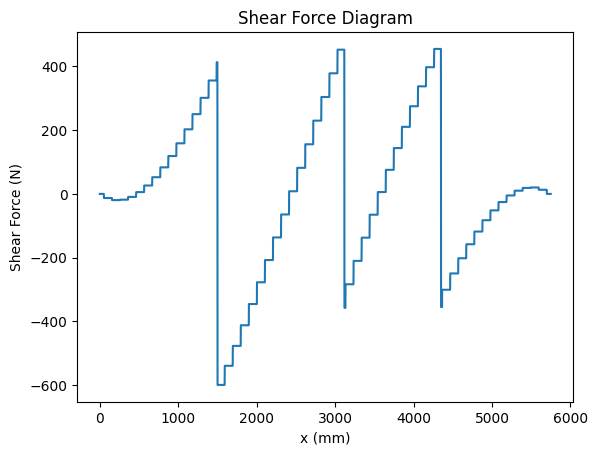

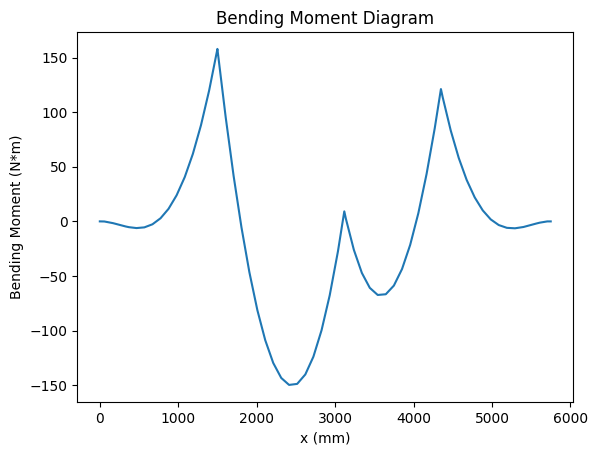

Maximum positive shear is  454.792808420897 N.
Maximum negative shear is  -599.2288152716278 N.
Maximum positive moment is  157.90594419015014 Nm.
Maximum negative moment is  -149.72819975461826 Nm.
Moment at the end is  -0.017516114428706875 Nm.


In [40]:
difference = water_weight - total_mass
vol_mass = []

for i in range(0,len(vol_out),1):
    mass = (vol_out[i]/10**9)*water_den - difference/len(vol_out)
    vol_mass.append(mass)
    
# Plot SFD and BMD
pad_weight = [pad1, pad2, pad3]

length = max(x_out)
pad_po = [pad1_po, pad2_po, pad3_po]

stat_x = []
for i in range(0,len(station)-1,1):
    stat_x.append((station[i]+station[i+1])/2)

g = 9.81
x = []
shear = []
for i in range(0,int(length),1):
    x.append(i)
    shear_force = 0
    for j in range(0,len(stat_x),1):
        if i >= stat_x[j]:
            shear_force  = shear_force + vol_mass[j]*g +(-1)*stat_Mass[j]*g*DLF
        else:
            shear_force = shear_force
    for k in range(0,len(pad_po),1):
        if i >= pad_po[k]:
            shear_force = shear_force - pad_weight[k]*g
        else:
            shear_force = shear_force
    shear.append(shear_force)

plt.plot(x,shear)
plt.title('Shear Force Diagram')
plt.xlabel('x (mm)')
plt.ylabel('Shear Force (N)')
plt.show()

moment = []
moment.append(0)
bending_moment = 0
for i in range(1,len(x),1):
    bending_moment = bending_moment + (x[i]-x[i-1])*shear[i]/1000
    moment.append(bending_moment)

plt.plot(x,moment)
plt.title('Bending Moment Diagram')
plt.xlabel('x (mm)')
plt.ylabel('Bending Moment (N*m)')
plt.show()

# Track mm distance of station for paddler positions
mm_traveled = 0
paddler_counter = 0

# Store Vf and paddlers? for csv file
Paddler_array = []
Station_by_length = []

for i in range(1, len(station)):

    # Check if a paddler is in this station and calculate the new distance travelled accordingly
    stationHasPaddler = False
    
    delta_mm_traveled = mm_traveled + float(canoe_info[4][i])

    # Any distance between the distance travlled (rounded) and the new distance travelled (larger due to more paddlers) (also rounded) will be saved. Anything else is discarded
    for j in range(round(mm_traveled), round(delta_mm_traveled)):
        Station_by_length.append(i)

    if(paddler_counter < len(pad_po)) and (mm_traveled <= pad_po[paddler_counter] and delta_mm_traveled > pad_po[paddler_counter]):
        stationHasPaddler = True
        paddler_counter += 1
    mm_traveled = delta_mm_traveled

    Paddler_array.append(stationHasPaddler)

# Export points to csv file (only calculates maximum shear and moments -> outlined below):
df1 = pd.DataFrame(data={'Station': Station_by_length, 'Length': x, 'Moment': moment})

csv_file = 'Length_vs_Moment_3 Paddler.csv'
script_dir = os.path.abspath('data')
file_path = os.path.join(script_dir, csv_file)
df1.to_csv(file_path, index=False)

shear_max_index = shear.index(max(shear))
#x(shear_max_index)

print('Maximum positive shear is ', max(shear), 'N.')
print('Maximum negative shear is ', min(shear), 'N.')
print('Maximum positive moment is ', max(moment), 'Nm.')
print('Maximum negative moment is ', min(moment), 'Nm.')
print('Moment at the end is ', moment[len(moment)-1],'Nm.')

In [41]:
# export the values to csv file
titles = ['Positive Shear [N]', 'Negative Shear [N]', 'Positive Bending Moment [Nm]', 'Negative Bending Moment [Nm]', 'Moment at the end [Nm]']
values = [max(shear), min(shear), max(moment), min(moment), moment[len(moment)-1]]
station_no = []
max_width = []
max_depth = []
station_t = [] # Station thickness

for value in [max(shear), min(shear)]:
    shear_index = shear.index(value)
    xshear = x[shear_index]
    for i in range(0,len(station)-1,1):
        if (xshear >= station[i] and xshear < station[i+1]):
            station_index = i+1

    X1_value = station[station_index-1]
    X2_value = station[station_index]
    Y1 = []
    Y2 = []
    Z1 = []
    Z2 = []        
    for i in range(0,len(y_out),1):
        if x_out[i] == X1_value:
            Y1.append(y_out[i])
            Z1.append(z_out[i])
        elif x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])
    width = (max(Y1)-min(Y1)+max(Y2)-min(Y2))/2
    depth = (abs(min(Z1))+abs(min(Z2)))/2
    max_width.append(width)
    max_depth.append(depth)
    station_no.append(station_index)
    station_t.append(abs(X2_value - X1_value))

for value in [max(moment), min(moment)]:
    moment_index = moment.index(value)
    xmoment = x[moment_index]
    for i in range(0,len(station)-1,1):
        if (xmoment >= station[i] and xmoment < station[i+1]):
            station_index = i+1

    X1_value = station[station_index-1]
    X2_value = station[station_index]
    Y1 = []
    Y2 = []
    Z1 = []
    Z2 = []        
    for i in range(0,len(y_out),1):
        if x_out[i] == X1_value:
            Y1.append(y_out[i])
            Z1.append(z_out[i])
        elif x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])
    width = (max(Y1)-min(Y1)+max(Y2)-min(Y2))/2
    depth = (abs(min(Z1))+abs(min(Z2)))/2
    max_width.append(width)
    max_depth.append(depth)
    station_no.append(station_index)
    station_t.append(abs(X2_value - X1_value))
    
station_no.append(len(station)-1)  
max_width.append('')
max_depth.append('')
station_t.append('')

df1 = pd.DataFrame(data={'': titles, 'Value': values, 'Station No': station_no, 'Max Width [mm]': max_width, 'Max Depth [mm]': max_depth, 'Station Thickness [mm]': station_t})

csv_file = 'Shear_and_Moment_3 Paddlers.csv'
script_dir = os.path.abspath('data')
file_path = os.path.join(script_dir, csv_file)
df1.to_csv(file_path, index=False)



In [42]:
# Make a CSV file for buoyancy and gravity
# vol_mass (Array of force_buoyancy by station)
# stat_mass (Array of force_gravity by station)
df1 = pd.DataFrame(data={'Station No.': range(1, len(vol_mass) + 1, 1), 'Buoyancy Force [N]': [i * g for i in vol_mass], 'Self Weight': [i * g for i in stat_Mass] })

csv_file = 'Station_Loads_3 Paddlers.csv'
script_dir = os.path.abspath('data')
file_path = os.path.join(script_dir, csv_file)
df1.to_csv(file_path, index=False)
print("Complete !")

Complete !


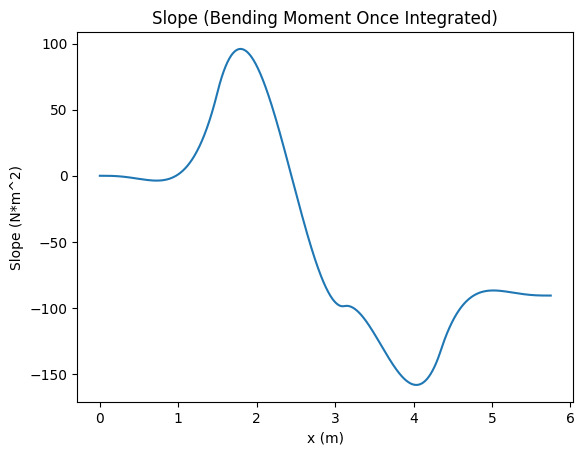

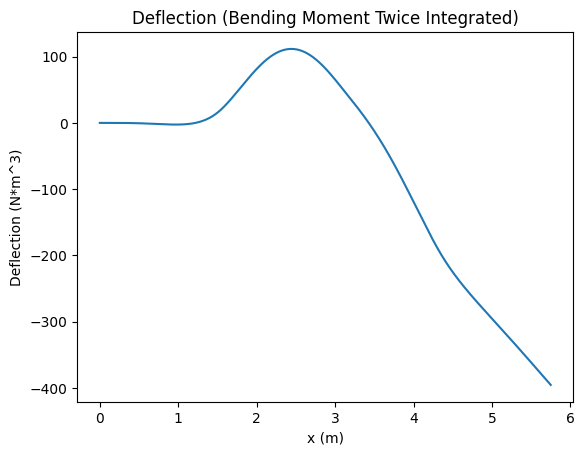

In [43]:
# Deflection for now <?>

# Convert x to m
x = [i / 1000 for i in x]

# Integrate a matplotlib graph
# xList and yList are from matplotlib graph
# C is the integration constant
def integrate(yList, xList, C):
    # The function starts at C
    output = [C]
    for i in range(len(xList) - 1):
        riemannHeight = yList[i+1] + yList[i] / 2
        riemannWidth = xList[i+1] - xList[i]
        output.append(output[i] + (riemannHeight * riemannWidth))
    return output


# Integrate to find slope
slope = integrate(moment, x, 0)

# Plot slope
plt.plot(x,slope)
plt.title("Slope (Bending Moment Once Integrated)")
plt.xlabel('x (m)')
plt.ylabel('Slope (N*m^2)')
plt.show()

# Integrate to find deflection
deflection = integrate(slope, x, 0)

# Plot Deflection
plt.plot(x,deflection)
plt.title("Deflection (Bending Moment Twice Integrated)")
plt.xlabel('x (m)')
plt.ylabel('Deflection (N*m^3)')
plt.show()
